<a href="https://colab.research.google.com/github/omuskaikar/Web-scraping-and-Sentiment-analysis/blob/main/Flipkart_Reviews_scrape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Web scraping and creating dataset

In [ ]:
import requests
from bs4 import BeautifulSoup

# Scrape reviews from Flipkart
flipkart_base_url = "https://www.flipkart.com/apple-iphone-7-jet-black-128-gb/product-reviews/itmen6dakdgkpy6n?pid=MOBEMK62VCQ2UMT8&lid=LSTMOBEMK62VCQ2UMT8IY1JYN&sortOrder=MOST_HELPFUL&certifiedBuyer=false&aid=overall&page="

# Number of pages you want to scrape from Flipkart
num_pages = 5

flipkart_all_reviews = []  # List to store all the reviews from Flipkart

for page in range(1, num_pages+1):
    flipkart_url = flipkart_base_url + str(page)
    flipkart_response = requests.get(flipkart_url)
    flipkart_soup = BeautifulSoup(flipkart_response.text, "html.parser")
    flipkart_reviews = flipkart_soup.find_all("div", class_="_27M-vq")

    # ...

    # ...

    # ...

    for review in flipkart_reviews:
        review_info = review.find_all("p", class_="_2sc7ZR")
        reviewer_name = review_info[0].text.strip()  # Scrape reviewer name
        review_title = review.find("p", class_="_2-N8zT").text.strip()
        review_paragraph = review.find("div", class_="t-ZTKy").text.strip()
        star_rating = review.find("div", class_="_3LWZlK").text.strip()
        review_date = review_info[1].text.strip()  # Scrape review date

        flipkart_all_reviews.append((reviewer_name, review_title, review_paragraph, star_rating, review_date))

# ...

# Print the reviews from Flipkart
print("Flipkart Reviews:")
for review in flipkart_all_reviews:
    print("Reviewer Name:", review[0])
    print("Review Title:", review[1])
    print("Review Paragraph:", review[2])
    print("Star Rating:", review[3])
    print("Review Date:", review[4])
    print()

Flipkart Reviews:
Reviewer Name: SANCHIT NAGVENKAR
Review Title: IF U DON'T HAVE AN IPHONE, WELL U DON'T AN IPHONE.
Review Paragraph: The most awaited phone of the year. Being the iPhone 5S user for over 2 years, I just love the iPhone for its sturdy built and fabulous design. I've used all types of phone and operating system but this IOS is just awesome, the only phone which never lags or get hanged or restarts in between that's the best thing of apple's products. Got the phone delivered on 30/11/2016, which on time so no complaint on that. The product was delivered safely with no damage or any such other issues. It'...READ MORE
Star Rating: 5
Review Date: Dec, 2016

Reviewer Name: Jaya Pahlajani
Review Title: Horrible
Review Paragraph: Mediocre product and service. The phone worked well for first 10 days but started heating while using and Charing after that. The battery takes 3 hrs to fully charge and same time to discharge. I am worried if it will explode in my hand. No help from f

In [ ]:
!pip install emoji
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for emoji: filename=emoji-2.7.0-py2.py3-none-any.whl size=356563 sha256=f2859b1fc0b394cdc5a807fa798ae77085b07c7f154d49d64ad6056f153ded22
  Stored in directory: /root/.cache/pip/wheels/41/11/48/5df0b9727d5669c9174a141134f10304d1d78a3b89a4676f3d
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import emoji

# Scrape reviews from Flipkart
flipkart_base_url = "https://www.flipkart.com/apple-iphone-7-jet-black-128-gb/product-reviews/itmen6dakdgkpy6n?pid=MOBEMK62VCQ2UMT8&lid=LSTMOBEMK62VCQ2UMT8IY1JYN&sortOrder=MOST_HELPFUL&certifiedBuyer=false&aid=overall&page="

# Number of pages you want to scrape from Flipkart
num_pages = 30

flipkart_all_reviews = []  # List to store all the reviews from Flipkart

for page in range(1, num_pages + 1):
    flipkart_url = flipkart_base_url + str(page)
    flipkart_response = requests.get(flipkart_url)
    flipkart_soup = BeautifulSoup(flipkart_response.text, "html.parser")
    flipkart_reviews = flipkart_soup.find_all("div", class_="_27M-vq")

    for review in flipkart_reviews:
        review_info = review.find_all("p", class_="_2sc7ZR")
        reviewer_name = review_info[0].text.strip()  # Scrape reviewer name
        review_title = review.find("p", class_="_2-N8zT").text.strip()

        # Extract review text, including hidden content
        review_text = review.find("div", class_="t-ZTKy").get_text(separator="\n").strip()

        star_rating = review.find("div", class_="_3LWZlK").text.strip()
        review_date = review_info[1].text.strip()  # Scrape review date
        review_text = emoji.demojize(review_text)

        flipkart_all_reviews.append((reviewer_name, review_title, review_text, star_rating, review_date))

# Create a DataFrame from the reviews
df = pd.DataFrame(flipkart_all_reviews, columns=["Reviewer Name", "Review Title", "Review Paragraph", "Star Rating", "Review Date"])

In [ ]:
df

,Reviewer Name,Review Title,Review Paragraph,Star Rating,Review Date
0,SANCHIT NAGVENKAR,"IF U DON'T HAVE AN IPHONE, WELL U DON'T AN IPH...",The most awaited phone of the year. Being the ...,5,"Dec, 2016"
1,Jaya Pahlajani,Horrible,Mediocre product and service. The phone worked...,1,"Nov, 2016"
2,Flipkart Customer,TOOOO GOOOOOOD !!!!!!,iphone 7 is superb as expected. I got upgraded...,5,"Oct, 2016"
3,Neeladri V,Great product,Nice product . u will feel the difference.\nRE...,5,"Jul, 2020"
4,Kiran Chaluvaiah,Worthy upgrade from iPhone 6,Firstly flipkart did a fair job on delivering ...,4,"Oct, 2016"
...,...,...,...,...,...
295,Chetan gupta,Kudos,"Ordered much hesitantly, seeing all the videos...",5,"Jan, 2018"
296,Tanmay Joshi,Excellent product quality & condition by Flipkart,"What an excellent phone!! Apple at its best, h...",5,"Jan, 2018"
297,Flipkart Customer,Simply awesome,No words excellent product. Thank u soo much ...,5,"Dec, 2017"
298,Gagandeep singh,Awesome,This is my first Apple device and very happy t...,5,"Dec, 2017"


In [ ]:
df.to_csv('flipkart_reviews',index=False)

#Sentiment Analysis

In [ ]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load your DataFrame here
# df = ...

# Convert to lowercase, remove special characters and numbers
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['Processed Review Paragraph'] = df['Review Paragraph'].apply(preprocess_text)

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens

df['Processed Tokens'] = df['Processed Review Paragraph'].apply(tokenize_and_remove_stopwords)

# Print the DataFrame with the processed column
df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviewer Name,Review Title,Review Paragraph,Star Rating,Review Date,Processed Review Paragraph,Processed Tokens
0,SANCHIT NAGVENKAR,"IF U DON'T HAVE AN IPHONE, WELL U DON'T AN IPH...",The most awaited phone of the year. Being the ...,5,"Dec, 2016",the most awaited phone of the year being the i...,"[awaited, phone, year, iphone, user, years, lo..."
1,Jaya Pahlajani,Horrible,Mediocre product and service. The phone worked...,1,"Nov, 2016",mediocre product and service the phone worked ...,"[mediocre, product, service, phone, worked, we..."
2,Flipkart Customer,TOOOO GOOOOOOD !!!!!!,iphone 7 is superb as expected. I got upgraded...,5,"Oct, 2016",iphone is superb as expected i got upgraded m...,"[iphone, superb, expected, got, upgraded, earl..."
3,Neeladri V,Great product,Nice product . u will feel the difference.\nRE...,5,"Jul, 2020",nice product u will feel the difference\nread...,"[nice, product, u, feel, difference, read]"
4,Kiran Chaluvaiah,Worthy upgrade from iPhone 6,Firstly flipkart did a fair job on delivering ...,4,"Oct, 2016",firstly flipkart did a fair job on delivering ...,"[firstly, flipkart, fair, job, delivering, pho..."
...,...,...,...,...,...,...,...
295,Chetan gupta,Kudos,"Ordered much hesitantly, seeing all the videos...",5,"Jan, 2018",ordered much hesitantly seeing all the videos ...,"[ordered, much, hesitantly, seeing, videos, pe..."
296,Tanmay Joshi,Excellent product quality & condition by Flipkart,"What an excellent phone!! Apple at its best, h...",5,"Jan, 2018",what an excellent phone apple at its best henc...,"[excellent, phone, apple, best, hence, needles..."
297,Flipkart Customer,Simply awesome,No words excellent product. Thank u soo much ...,5,"Dec, 2017",no words excellent product thank u soo much f...,"[words, excellent, product, thank, u, soo, muc..."
298,Gagandeep singh,Awesome,This is my first Apple device and very happy t...,5,"Dec, 2017",this is my first apple device and very happy t...,"[first, apple, device, happy, say, iphone, goo..."


In [ ]:
df = df.sort_values(by='Star Rating', ascending=False)
df


,Reviewer Name,Review Title,Review Paragraph,Star Rating,Review Date,Processed Review Paragraph,Processed Tokens
0,SANCHIT NAGVENKAR,"IF U DON'T HAVE AN IPHONE, WELL U DON'T AN IPH...",The most awaited phone of the year. Being the ...,5,"Dec, 2016",the most awaited phone of the year being the i...,"[awaited, phone, year, iphone, user, years, lo..."
194,Mehul Vaghasiya,Must buy!,Best mobile if want to use ios with tight budg...,5,"Nov, 2019",best mobile if want to use ios with tight budg...,"[best, mobile, want, use, ios, tight, budget, ..."
178,LOvepreet Singh,Terrific purchase,Excellent very impressive\nCamera equality was...,5,"Nov, 2019",excellent very impressive\ncamera equality was...,"[excellent, impressive, camera, equality, impr..."
179,Anshul Tiwari,Best in the market!,I am just loving it. Its my first IOS and its ...,5,"Oct, 2019",i am just loving it its my first ios and its e...,"[loving, first, ios, experince, goodhowever, l..."
180,Ayan Das,Awesome,Genuine product....you should go for it... tha...,5,"Oct, 2019",genuine productyou should go for it thanks to ...,"[genuine, productyou, go, thanks, flipkart, fa..."
...,...,...,...,...,...,...,...
165,singh sandeep,Waste of money!,Very bad product battery was so fast draining ...,1,"Mar, 2020",very bad product battery was so fast draining ...,"[bad, product, battery, fast, draining, watch,..."
169,Sunil Pandey,Absolute rubbish!,with in 3 day used this is dead suddenly not s...,1,"Nov, 2018",with in day used this is dead suddenly not sh...,"[day, used, dead, suddenly, show, charging, un..."
190,Swapnil Gobade,Absolute rubbish!,An i phone worth half lakh give away its color...,1,"Jun, 2017",an i phone worth half lakh give away its color...,"[phone, worth, half, lakh, give, away, color, ..."
87,Bharatbhai parmar,Hated it!,when I Have Received Courier from flipkart and...,1,"Dec, 2018",when i have received courier from flipkart and...,"[received, courier, flipkart, open, iphone, st..."


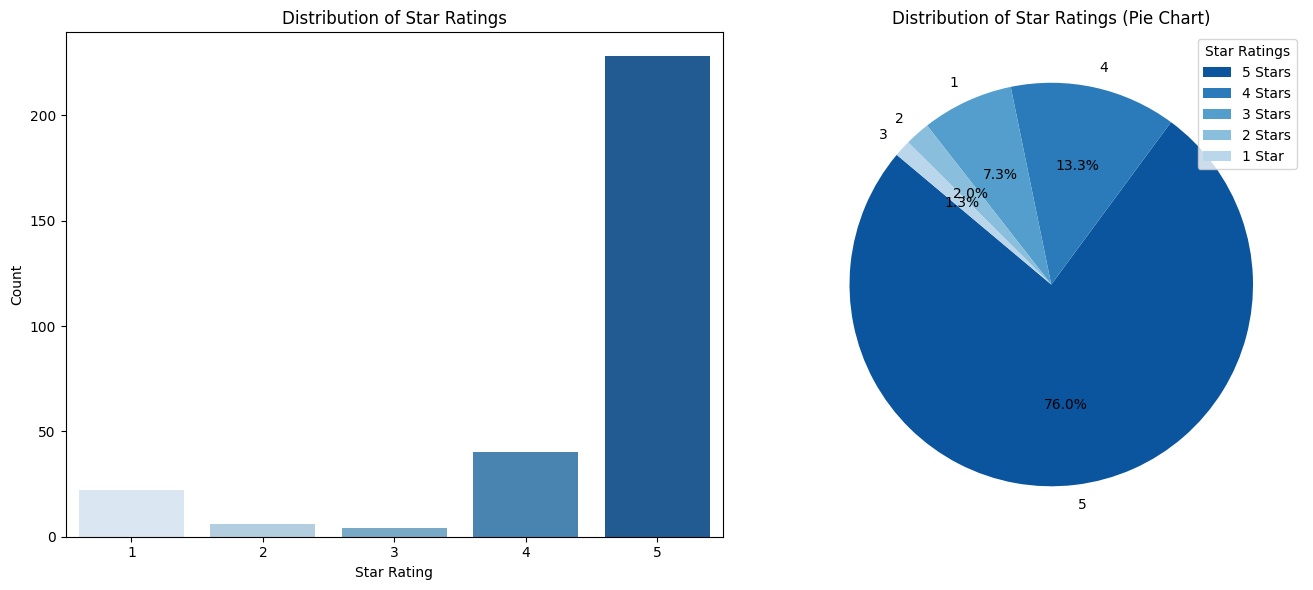

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Star Rating', palette='Blues')  # Reverse blues color palette and set the order
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')

# Subplot 2: Pie Chart
plt.subplot(1, 2, 2)
star_counts = df['Star Rating'].value_counts()
plt.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Blues_r'), startangle=140)  # Reverse blues color palette
plt.title('Distribution of Star Ratings (Pie Chart)')
plt.legend(title="Star Ratings", labels=["5 Stars", "4 Stars", "3 Stars", "2 Stars", "1 Star"], loc='upper right')  # Adjust the legend position

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores and categorize sentiment
def get_sentiment_score(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

# Apply the sentiment analysis function to the processed review paragraphs
df['Sentiment Scores'] = df['Processed Review Paragraph'].apply(get_sentiment_score)

# Function to categorize sentiment
def categorize_sentiment(sentiment_scores):
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization to the sentiment scores
df['Sentiment'] = df['Sentiment Scores'].apply(categorize_sentiment)


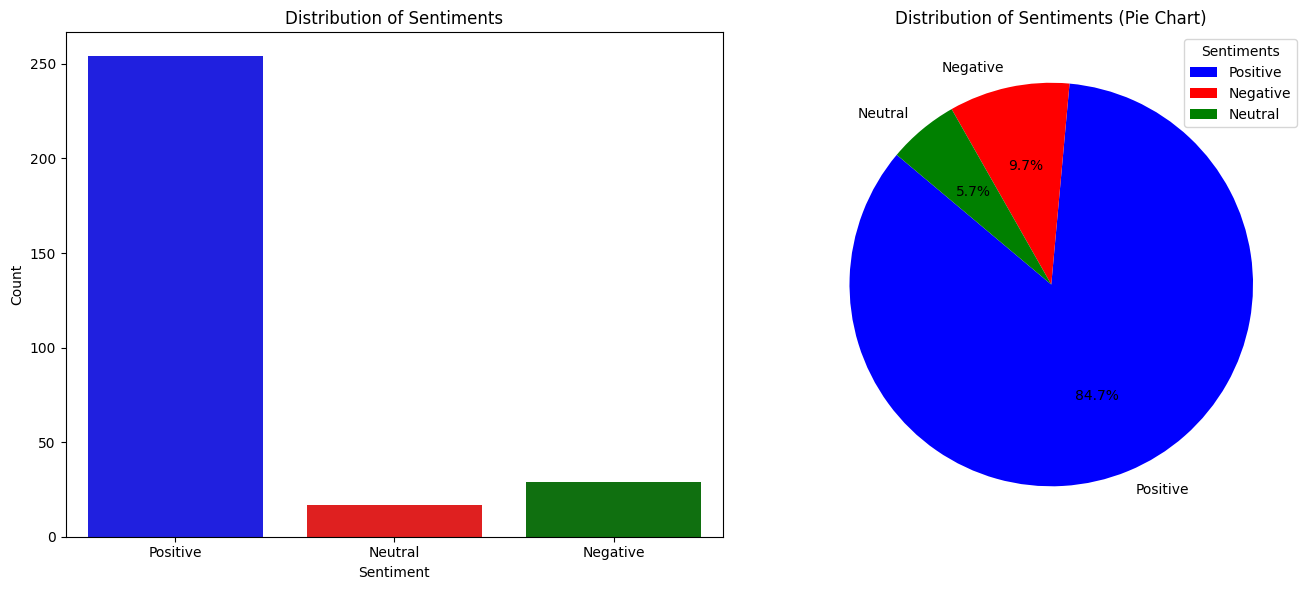

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom colors for sentiment categories
colors = {'Positive': 'blue', 'Negative': 'red', 'Neutral': 'green'}

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Countplot for Sentiment Distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Sentiment', palette=colors.values())
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Subplot 2: Pie Chart for Sentiment Distribution
plt.subplot(1, 2, 2)
sentiment_counts = df['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=[colors[s] for s in sentiment_counts.index], startangle=140)
plt.title('Distribution of Sentiments (Pie Chart)')
plt.legend(title="Sentiments", labels=["Positive", "Negative", "Neutral"], loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
